==> (422784,) (422784,)
freq==> (422784,)
filtered_data==> [278.00003 276.8617  275.6699  274.42487 273.12686 271.77612 270.3729
 268.91745 267.41013 265.85117]
噪声去除处理完成，已生成文件 output.wav


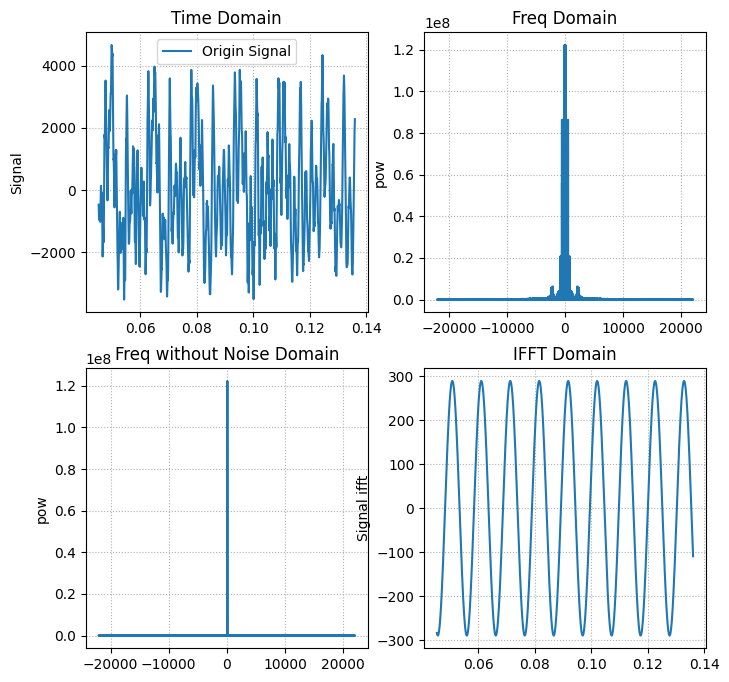

In [10]:
### 傅立叶变换 去噪声

import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav
from numpy.ma.extras import median

# 读取音频文件（WAV格式）
rate, data = wav.read('../assets/sample-9s.wav')

# 如果是立体声，则转换为单声道（取平均）
if data.ndim == 2:
    data = data.mean(axis=1)

# 转换数据类型为浮点型（便于FFT计算）
data = data.astype(np.float32)


###绘制音频时域图:时间/位移图像
times = np.arange(len(data)) / rate ##单位s 除以采样频率,只是为了计算出精准的时间
print('==>', times.shape, data.shape)
# print(times[0:10])
fig = plt.figure('Filter', figsize=(8, 8))
fig.add_subplot(2, 2, 1)
plt.title('Time Domain')
plt.ylabel('Signal')
plt.grid(linestyle=':')
plt.plot(times[2000:6000], data[2000:6000], label='Origin Signal')
plt.legend()

# 对音频信号进行傅立叶变换，得到频域表示
fft_data = np.fft.fft(data) ## 这是个complex_array 模代表振幅
# 得到对应的频率数组（正负频率）
freq = np.fft.fftfreq(len(data), d=1.0/rate) ## 1/rate即2个采样点的时间差
print('freq==>', freq.shape)

### 绘制音频频域图像:频率/能量(振幅)图像
pows = np.abs(fft_data) ## 求模,获取振幅,即能量值
plt.subplot(2, 2, 2)
plt.title('Freq Domain')
plt.ylabel('pow')
plt.grid(linestyle=':')
plt.plot(freq, pows)

## 去噪声方法1
# 将低能噪声去除掉
fun_freq = freq[pows.argmax()]
noise_indices = np.where(freq != fun_freq)[0]
fft_data2 = fft_data.copy()
fft_data2[noise_indices] = 0
filtered_pow = np.abs(fft_data2)
plt.subplot(2, 2, 3)
plt.title('Freq without Noise Domain')
plt.ylabel('pow')
plt.grid(linestyle=':')
plt.plot(freq, filtered_pow)

## 去噪声方法2
# 设计低通滤波器：设定截止频率（例如：4000Hz，高于该频率的部分认为主要为噪声）
# cutoff = 4000  # 截止频率，可以根据实际情况调整
# # 构造掩码，保留低于截止频率的信号，高于截止频率的置零
# mask = np.abs(freq) > cutoff
# ## 滤波
# fft_data[mask] = 0

# plt.subplot(2, 2, 4)
# plt.title('Freq without Noise2 Domain')
# plt.ylabel('pow')
# plt.grid(linestyle=':')
# plt.plot(freq, fft_data)


# 进行逆傅立叶变换，得到滤波后的时域信号
filtered_data = np.fft.ifft(fft_data2)
# 因为输入信号为实数，取实部（舍弃计算误差引入的虚部）
filtered_data = np.real(filtered_data)

# 归一化处理，并转换为16位整型（假设原始WAV为16位）
# filtered_data = filtered_data / np.max(np.abs(filtered_data)) * 32767
# filtered_data = np.int16(filtered_data)

print('filtered_data==>', filtered_data[0:10])

## 逆傅立叶变换后的时间/位移图像
plt.subplot(2, 2, 4)
plt.title('IFFT Domain')
plt.ylabel('Signal ifft')
plt.grid(linestyle=':')
plt.plot(times[2000:6000], filtered_data[2000:6000])


# 将滤波后的音频保存为新文件
wav.write('../assets/output.wav', rate, filtered_data)

print("噪声去除处理完成，已生成文件 output.wav")

plt.show()

In [12]:
### 数据分布
## 二项式分布
## (n p size)
## n次实验, p是概率, size是生成个数
## 某人投篮命中率0.7, 投10次, 投进的个数--生成100组
np.random.binomial(10, 0.7, 100)

array([ 7,  6,  8,  6,  4,  4,  8,  7,  9,  9,  8,  7,  6,  5,  6,  8,  7,
        5,  5,  6,  6,  7,  3,  9,  8,  5,  8,  8,  6,  8,  7, 10, 10,  8,
        7,  6,  9,  6,  8,  8,  6,  8,  6,  8,  8,  6,  8,  7,  9,  6,  6,
        6,  9,  8,  7,  9,  8,  5,  9,  6,  7,  7,  7,  8,  7,  8,  7,  5,
        7,  8,  7,  9,  8,  7,  6, 10,  6,  7,  5,  6,  9,  6,  4,  7,  7,
        6,  8,  9,  8,  7,  9,  7,  8,  5,  7,  7,  6,  7,  6,  8])

In [18]:
arr = np.random.binomial(10, 0.7, 100)
## 投进去5个球的概率
for i in range(11):
    p = sum(arr == i) / 100
    print(f'投进{i}个球的概率是:{p}')

投进0个球的概率是:0.0
投进1个球的概率是:0.0
投进2个球的概率是:0.01
投进3个球的概率是:0.0
投进4个球的概率是:0.06
投进5个球的概率是:0.06
投进6个球的概率是:0.23
投进7个球的概率是:0.21
投进8个球的概率是:0.28
投进9个球的概率是:0.14
投进10个球的概率是:0.01


In [19]:
### 超几何分布
### 产生size个随机数,随机数是在(ngood + nbad)的样本数中, 抽取nsample个,
### 其中好样本ngood的个数
np.random.hypergeometric(ngood=6, nbad=4, nsample=3, size=100)

array([2, 2, 2, 3, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0,
       2, 3, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 2, 3, 2, 0, 2, 2, 2, 1,
       3, 2, 1, 1, 2, 1, 3, 2, 2, 2, 1, 3, 2, 1, 2, 1, 3, 2, 2, 2, 0, 3,
       1, 2, 1, 0, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 3, 1, 2, 1, 1, 2])

In [34]:
arr = np.random.hypergeometric(ngood=6, nbad=4, nsample=3, size=100)
print(arr)
for i in range(4):
    p = sum(arr == i) / 100
    print(f"抽取到{i}个好样本的概率是:{p}")

[3 1 1 2 1 1 1 2 2 2 3 1 1 1 2 2 3 1 2 2 3 2 2 2 2 2 2 2 3 2 1 1 3 3 1 1 2
 2 2 2 0 2 2 1 2 2 1 2 2 1 3 2 2 2 2 1 2 3 2 1 2 0 2 3 2 1 1 1 1 2 1 2 2 2
 2 2 2 1 3 1 1 1 2 1 2 2 1 1 2 2 2 1 0 2 1 1 2 2 3 2]
抽取到0个好样本的概率是:0.03
抽取到1个好样本的概率是:0.33
抽取到2个好样本的概率是:0.52
抽取到3个好样本的概率是:0.12


In [36]:
### 排序
stocks = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
prices = np.array([92, 83, 71, 92, 40, 12, 64])
volumes = np.array([100, 251, 4, 12, 709, 12, 75])
## (次要序列, 主要序列)
sort_index = np.lexsort((prices, volumes))
stocks[sort_index]

array(['C', 'F', 'D', 'G', 'A', 'B', 'E'], dtype='<U1')

In [37]:
np.sort_complex([1+2j, 3+4j, -2+3j, 3-2j])

array([-2.+3.j,  1.+2.j,  3.-2.j,  3.+4.j])

In [40]:
a = np.array([1, 3, 5, 7, 9])
b = np.array([2, 4, 7])
## 查找待插入位置
indices = np.searchsorted(a, b)
print(indices)
## 被插序列, 插入位置序列, 待插入序列
np.insert(a, indices, b)

[1 2 3]


array([1, 2, 3, 4, 5, 7, 7, 9])

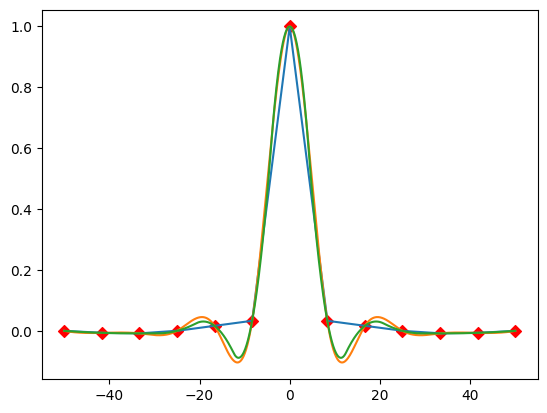

In [46]:
import scipy.interpolate as si
import matplotlib.pyplot as plt
min_x = -50
max_x = 50
dis_x = np.linspace(min_x, max_x, 13)
dis_y = np.sinc(dis_x)

linear = si.interp1d(dis_x, dis_y, kind='linear')
x = np.linspace(min_x, max_x, 1000)
y = linear(x)
y1 = si.interp1d(dis_x, dis_y, kind='cubic')(x)
y2 = si.interp1d(dis_x, dis_y, kind='quadratic')(x)

plt.figure()
plt.scatter(dis_x, dis_y, color='red', marker='D')
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

206.8


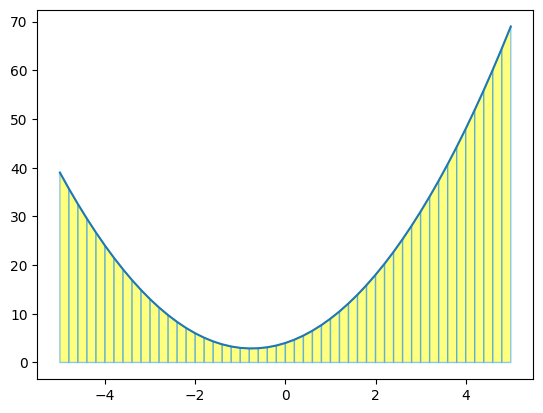

In [54]:
### 积分

def f(x):
    return 2*x**2 + 3*x + 4

n = 50
x = np.linspace(-5, 5, n+1)
y = f(x)

## 微元法
area = 0
for i in range(n):
    ## 梯型面积
    area += (y[i] + y[i+1]) * (x[i+1] - x[i]) / 2
print(area)

plt.figure()
plt.plot(x, y)

for i in range(n):
    plt.gca().add_patch(
        plt.Polygon(
            [(x[i], 0),
             (x[i], y[i]),
             (x[i + 1], y[i + 1]),
             (x[i + 1], 0)],
            fc = 'yellow',
            ec = 'dodgerblue',
            alpha = 0.5
        )
    )

plt.show()

In [ ]:
import scipy.integrate as si
## 函数,积分上限,积分下限
area = si.quad(f, -5, 5)
## 返回的是 (积分值,误差)
print(area)

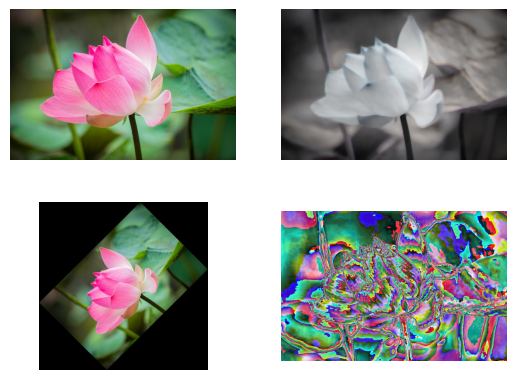

In [61]:
### scipy的图像处理
## 高斯模糊,角度旋转,边缘识别

import scipy.ndimage as sn
import matplotlib.pyplot as plt
original = plt.imread('../assets/lotus.jpg')

## 高斯模糊
median = sn.median_filter(original, 10)

## 角度旋转
rotate = sn.rotate(original, 45)

## 边缘识别
prewitt = sn.prewitt(original)

fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.imshow(original)
ax.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(median)
ax.axis('off')

ax = fig.add_subplot(2, 2, 3)
ax.imshow(rotate)
ax.axis('off')

ax = fig.add_subplot(2, 2, 4)
ax.imshow(prewitt)
ax.axis('off')

plt.show()


`plt.gca().add_patch()` 是 Matplotlib 中用于向当前轴（axes）添加一个“补丁”（patch）的函数。补丁通常是指二维图形对象，比如矩形、圆形、多边形等，常用于绘制自定义形状或标注区域。下面我将详细解释它的作用和参数，并用表格形式整理相关信息。

### 作用
- `plt.gca()`：获取当前的轴对象（"get current axes"），即当前正在操作的绘图区域。
- `add_patch(patch)`：将一个指定的补丁对象（例如矩形、圆形等）添加到当前轴上，用于增强图形的可视化效果或标记特定区域。

这个方法本身不直接指定补丁的类型或参数，而是需要一个预先定义的 `matplotlib.patches` 对象作为输入。因此，参数取决于你传入的补丁对象类型。

---

### 参数
`plt.gca().add_patch()` 的直接参数只有一个，即 `patch`，但具体的属性和参数取决于你使用的补丁对象（例如 `Rectangle`、`Circle` 等）。以下是常见的补丁类型及其参数的表格描述：

#### 表格 1：`plt.gca().add_patch(patch)` 的基本参数
| 参数名   | 类型                     | 描述                                      | 示例                     |
|----------|--------------------------|-------------------------------------------|--------------------------|
| `patch`  | `matplotlib.patches.Patch` | 一个补丁对象，例如矩形、圆形、多边形等    | `Rectangle((0, 0), 1, 1)` |

#### 表格 2：常见补丁类型及其参数
以下是几种常用补丁类型的参数说明，供你在调用 `add_patch()` 前创建补丁对象时使用。

1. **`Rectangle`（矩形）**
   | 参数名       | 类型    | 描述                              | 默认值    | 示例             |
   |--------------|---------|-----------------------------------|-----------|------------------|
   | `xy`         | tuple   | 矩形左下角的坐标 (x, y)          | 无        | `(0.1, 0.1)`    |
   | `width`      | float   | 矩形宽度                          | 无        | `0.5`           |
   | `height`     | float   | 矩形高度                          | 无        | `0.3`           |
   | `linewidth`  | float   | 边框线宽度                        | 1.0       | `2`             |
   | `edgecolor`  | str     | 边框颜色                          | 'black'   | `'r'` (红色)    |
   | `facecolor`  | str     | 填充颜色                          | 'gray'    | `'none'` (无填充) |

2. **`Circle`（圆形）**
   | 参数名       | 类型    | 描述                              | 默认值    | 示例             |
   |--------------|---------|-----------------------------------|-----------|------------------|
   | `xy`         | tuple   | 圆心坐标 (x, y)                  | 无        | `(0.5, 0.5)`    |
   | `radius`     | float   | 圆的半径                          | 无        | `0.2`           |
   | `linewidth`  | float   | 边框线宽度                        | 1.0       | `1.5`           |
   | `edgecolor`  | str     | 边框颜色                          | 'black'   | `'b'` (蓝色)    |
   | `facecolor`  | str     | 填充颜色                          | 'gray'    | `'yellow'`      |

3. **`Polygon`（多边形）**
   | 参数名       | 类型    | 描述                              | 默认值    | 示例             |
   |--------------|---------|-----------------------------------|-----------|------------------|
   | `xy`         | array   | 多边形顶点的坐标数组，形状为 (n, 2) | 无      | `[[0,0], [1,1], [0,1]]` |
   | `closed`     | bool    | 是否闭合多边形                    | True      | `True`          |
   | `linewidth`  | float   | 边框线宽度                        | 1.0       | `1`             |
   | `edgecolor`  | str     | 边框颜色                          | 'black'   | `'g'` (绿色)    |
   | `facecolor`  | str     | 填充颜色                          | 'gray'    | `'none'`        |

#### 通用参数
许多补丁对象共享一些通用属性，可以在创建时设置：
| 参数名         | 类型    | 描述                              | 默认值    | 示例             |
|----------------|---------|-----------------------------------|-----------|------------------|
| `alpha`        | float   | 透明度 (0=透明, 1=不透明)         | 1.0       | `0.5`           |
| `zorder`       | int     | 绘制顺序（越大越靠上层）          | 1         | `10`            |
| `visible`      | bool    | 是否可见                          | True      | `False`         |

---

### 示例代码
以下是一个使用 `plt.gca().add_patch()` 添加不同补丁的示例：

```python
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

# 创建图形和轴
fig, ax = plt.subplots()

# 添加矩形
rect = Rectangle((0.1, 0.1), 0.4, 0.3, edgecolor='r', facecolor='none', linewidth=2)
plt.gca().add_patch(rect)

# 添加圆形
circle = Circle((0.7, 0.7), 0.2, edgecolor='b', facecolor='yellow', alpha=0.5)
plt.gca().add_patch(circle)

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# 显示图形
plt.show()
```

### 输出
- 这段代码会在图中绘制一个红色边框的矩形和一个黄色填充的蓝色边框圆形。

---

### 总结
- `plt.gca().add_patch()` 的核心作用是将预定义的补丁对象添加到当前轴。
- 参数完全取决于传入的 `patch` 对象类型（如 `Rectangle`、`Circle` 等）。
- 通过调整补丁的参数（如位置、大小、颜色等），你可以实现丰富的图形定制。

如果你有具体的需求（比如某种形状或效果），请告诉我，我可以进一步优化示例！